<a href="https://colab.research.google.com/github/Granero0011/DS-Unit-1-Sprint-4-Statistical-Tests-and-Experiments/blob/master/DS_Unit_1_Sprint_Challenge_4_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Science Unit 1 Sprint Challenge 4

## Exploring Data, Testing Hypotheses

In this sprint challenge you will look at a dataset of people being approved or rejected for credit.

https://archive.ics.uci.edu/ml/datasets/Credit+Approval

Data Set Information: This file concerns credit card applications. All attribute names and values have been changed to meaningless symbols to protect confidentiality of the data. This dataset is interesting because there is a good mix of attributes -- continuous, nominal with small numbers of values, and nominal with larger numbers of values. There are also a few missing values.

Attribute Information:
- A1: b, a.
- A2: continuous.
- A3: continuous.
- A4: u, y, l, t.
- A5: g, p, gg.
- A6: c, d, cc, i, j, k, m, r, q, w, x, e, aa, ff.
- A7: v, h, bb, j, n, z, dd, ff, o.
- A8: continuous.
- A9: t, f.
- A10: t, f.
- A11: continuous.
- A12: t, f.
- A13: g, p, s.
- A14: continuous.
- A15: continuous.
- A16: +,- (class attribute)

Yes, most of that doesn't mean anything. A16 (the class attribute) is the most interesting, as it separates the 307 approved cases from the 383 rejected cases. The remaining variables have been obfuscated for privacy - a challenge you may have to deal with in your data science career.

Sprint challenges are evaluated based on satisfactory completion of each part. It is suggested you work through it in order, getting each aspect reasonably working, before trying to deeply explore, iterate, or refine any given step. Once you get to the end, if you want to go back and improve things, go for it!

## Part 1 - Load and validate the data

- Load the data as a `pandas` data frame.
- Validate that it has the appropriate number of observations (you can check the raw file, and also read the dataset description from UCI).
- UCI says there should be missing data - check, and if necessary change the data so pandas recognizes it as na
- Make sure that the loaded features are of the types described above (continuous values should be treated as float), and correct as necessary

This is review, but skills that you'll use at the start of any data exploration. Further, you may have to do some investigation to figure out which file to load from - that is part of the puzzle.

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from scipy import stats

In [0]:
url= 'https://raw.githubusercontent.com/Granero0011/DS-Unit-1-Sprint-4-Statistical-Tests-and-Experiments/master/crx.csv'
ar= []

for x in range (1,17):
  ar.append("A"+ str(x))

In [0]:
data =pd.read_csv(url, header = None, names= ar)

In [9]:
data.head(10)

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
0,b,30.83,0.000,u,g,w,v,1.250,t,t,1,f,g,00202,0,+
1,a,58.67,4.460,u,g,q,h,3.040,t,t,6,f,g,00043,560,+
2,a,24.50,0.500,u,g,q,h,1.500,t,f,0,f,g,00280,824,+
3,b,27.83,1.540,u,g,w,v,3.750,t,t,5,t,g,00100,3,+
4,b,20.17,5.625,u,g,w,v,1.710,t,f,0,f,s,00120,0,+
5,b,32.08,4.000,u,g,m,v,2.500,t,f,0,t,g,00360,0,+
6,b,33.17,1.040,u,g,r,h,6.500,t,f,0,t,g,00164,31285,+
7,a,22.92,11.585,u,g,cc,v,0.040,t,f,0,f,g,00080,1349,+
8,b,54.42,0.500,y,p,k,h,3.960,t,f,0,f,g,00180,314,+
9,b,42.50,4.915,y,p,w,v,3.165,t,f,0,t,g,00052,1442,+


In [13]:
data.shape

(690, 16)

In [14]:
data.describe()

,A3,A8,A11,A15
count,690.000000,690.000000,690.00000,690.000000
mean,4.758725,2.223406,2.40000,1017.385507
std,4.978163,3.346513,4.86294,5210.102598
min,0.000000,0.000000,0.00000,0.000000
25%,1.000000,0.165000,0.00000,0.000000
50%,2.750000,1.000000,0.00000,5.000000
75%,7.207500,2.625000,3.00000,395.500000
max,28.000000,28.500000,67.00000,100000.000000


In [12]:
data.dtypes

A1      object
A2      object
A3     float64
A4      object
A5      object
A6      object
A7      object
A8     float64
A9      object
A10     object
A11      int64
A12     object
A13     object
A14     object
A15      int64
A16     object
dtype: object

In [16]:
data.isnull().sum()

A1     0
A2     0
A3     0
A4     0
A5     0
A6     0
A7     0
A8     0
A9     0
A10    0
A11    0
A12    0
A13    0
A14    0
A15    0
A16    0
dtype: int64

In [0]:
data=data.replace("?",np.nan)

In [30]:
data.isnull().sum()

A1     12
A2     12
A3      0
A4      6
A5      6
A6      9
A7      9
A8      0
A9      0
A10     0
A11     0
A12     0
A13     0
A14    13
A15     0
A16     0
dtype: int64

In [0]:
data= data.fillna(method='ffill')

In [32]:
data.isnull().sum()

A1     0
A2     0
A3     0
A4     0
A5     0
A6     0
A7     0
A8     0
A9     0
A10    0
A11    0
A12    0
A13    0
A14    0
A15    0
A16    0
dtype: int64

In [0]:
data["A2"]=pd.to_numeric(data["A2"])

In [0]:
data["A14"]= pd.to_numeric(data["A14"])

## Part 2 - Exploring data, Testing hypotheses

The only thing we really know about this data is that A16 is the class label. Besides that, we have 6 continuous (float) features and 9 categorical features.

Explore the data: you can use whatever approach (tables, utility functions, visualizations) to get an impression of the distributions and relationships of the variables. In general, your goal is to understand how the features are different when grouped by the two class labels (`+` and `-`).

For the 6 continuous features, how are they different when split between the two class labels? Choose two features to run t-tests (again split by class label) - specifically, select one feature that is *extremely* different between the classes, and another feature that is notably less different (though perhaps still "statistically significantly" different). You may have to explore more than two features to do this.

For the categorical features, explore by creating "cross tabs" (aka [contingency tables](https://en.wikipedia.org/wiki/Contingency_table)) between them and the class label, and apply the Chi-squared test to them. [pandas.crosstab](http://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.crosstab.html) can create contingency tables, and [scipy.stats.chi2_contingency](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.chi2_contingency.html) can calculate the Chi-squared statistic for them.

There are 9 categorical features - as with the t-test, try to find one where the Chi-squared test returns an extreme result (rejecting the null that the data are independent), and one where it is less extreme.

**NOTE** - "less extreme" just means smaller test statistic/larger p-value. Even the least extreme differences may be strongly statistically significant.

Your *main* goal is the hypothesis tests, so don't spend too much time on the exploration/visualization piece. That is just a means to an end - use simple visualizations, such as boxplots or a scatter matrix (both built in to pandas), to get a feel for the overall distribution of the variables.

This is challenging, so manage your time and aim for a baseline of at least running two t-tests and two Chi-squared tests before polishing. And don't forget to answer the questions in part 3, even if your results in this part aren't what you want them to be.

In [0]:
#Let's divide the dataframe in "+" and "-"

table1 = data[data['A16']=='+']

In [59]:
table1.head(10)

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
0,b,30.83,0.000,u,g,w,v,1.250,t,t,1,f,g,202,0,+
1,a,58.67,4.460,u,g,q,h,3.040,t,t,6,f,g,43,560,+
2,a,24.50,0.500,u,g,q,h,1.500,t,f,0,f,g,280,824,+
3,b,27.83,1.540,u,g,w,v,3.750,t,t,5,t,g,100,3,+
4,b,20.17,5.625,u,g,w,v,1.710,t,f,0,f,s,120,0,+
5,b,32.08,4.000,u,g,m,v,2.500,t,f,0,t,g,360,0,+
6,b,33.17,1.040,u,g,r,h,6.500,t,f,0,t,g,164,31285,+
7,a,22.92,11.585,u,g,cc,v,0.040,t,f,0,f,g,80,1349,+
8,b,54.42,0.500,y,p,k,h,3.960,t,f,0,f,g,180,314,+
9,b,42.50,4.915,y,p,w,v,3.165,t,f,0,t,g,52,1442,+


In [60]:
table1.describe()

,A2,A3,A8,A11,A14,A15
count,307.000000,307.000000,307.000000,307.000000,307.000000,307.000000
mean,33.641173,5.904951,3.427899,4.605863,163.104235,2038.859935
std,12.805674,5.471485,4.120792,6.320242,161.320700,7659.763941
min,13.750000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,23.170000,1.500000,0.750000,0.000000,0.000000,0.000000
50%,30.170000,4.460000,2.000000,3.000000,120.000000,221.000000
75%,41.330000,9.520000,5.000000,7.000000,280.000000,1209.000000
max,76.750000,28.000000,28.500000,67.000000,840.000000,100000.000000


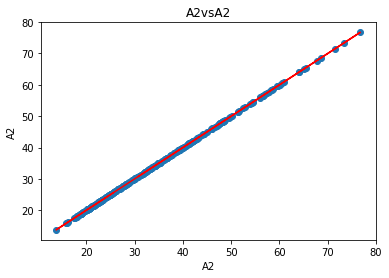

r_squared value forA2A2
1.0


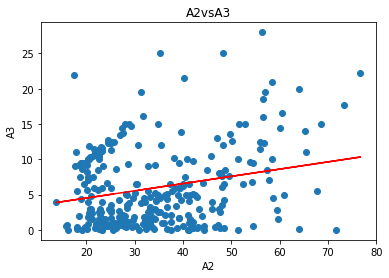

r_squared value forA2A3
0.057498203423518


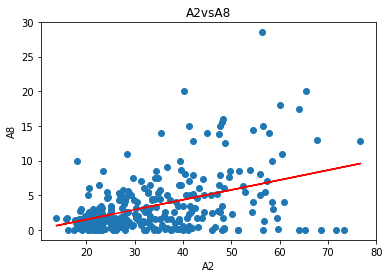

r_squared value forA2A8
0.19620589236594368


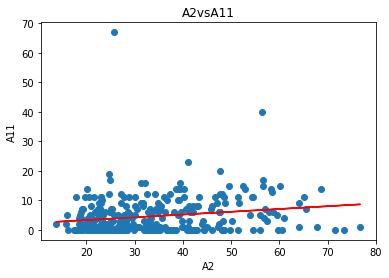

r_squared value forA2A11
0.03628948638157744


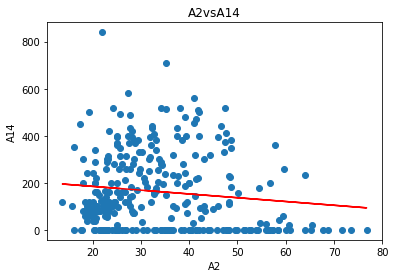

r_squared value forA2A14
0.016266362935134525


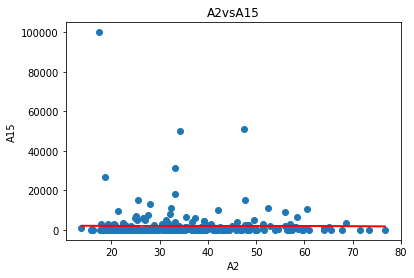

r_squared value forA2A15
0.0001191552038677163


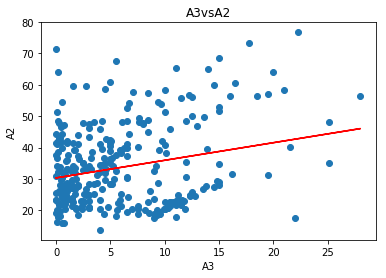

r_squared value forA3A2
0.057498203423518


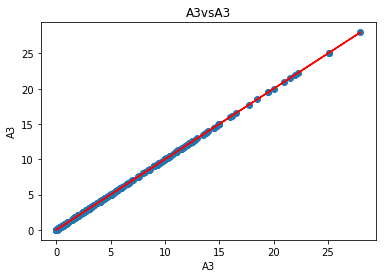

r_squared value forA3A3
1.0


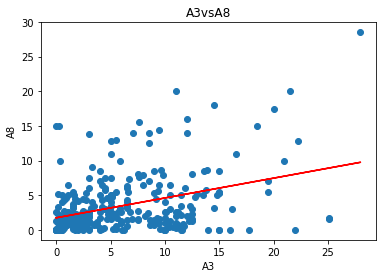

r_squared value forA3A8
0.1441265829943789


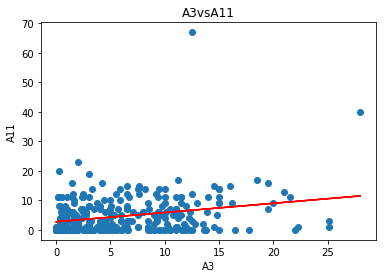

r_squared value forA3A11
0.07329668882844054


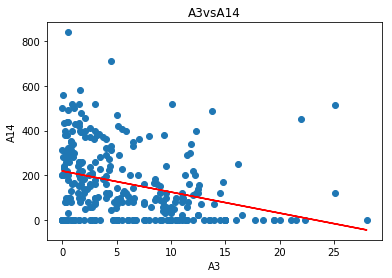

r_squared value forA3A14
0.10186242043699097


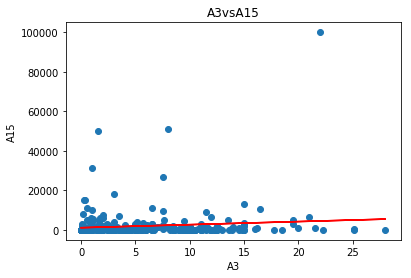

r_squared value forA3A15
0.01222705644635428


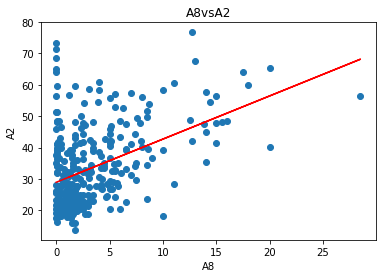

r_squared value forA8A2
0.19620589236594368


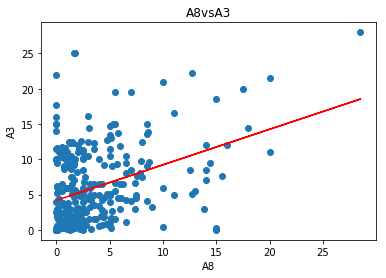

r_squared value forA8A3
0.1441265829943789


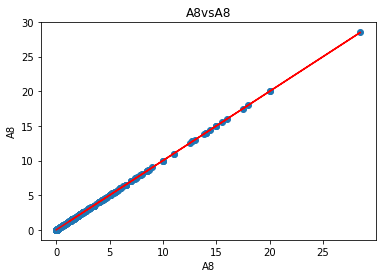

r_squared value forA8A8
1.0


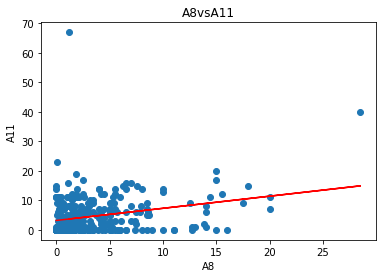

r_squared value forA8A11
0.07201623632288788


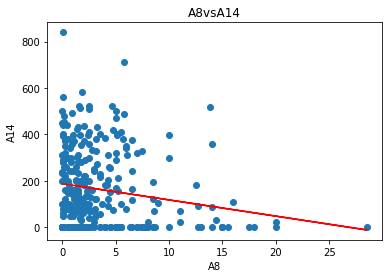

r_squared value forA8A14
0.03184220342147713


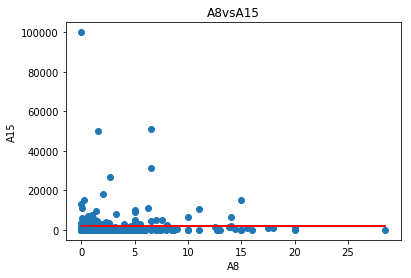

r_squared value forA8A15
1.8681306603300208e-06


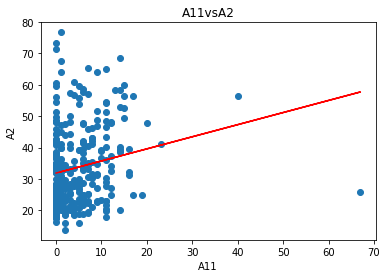

r_squared value forA11A2
0.03628948638157744


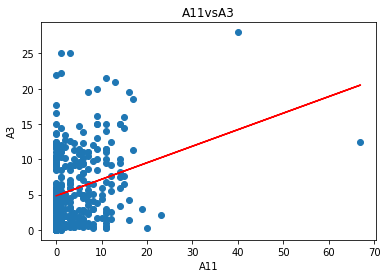

r_squared value forA11A3
0.07329668882844054


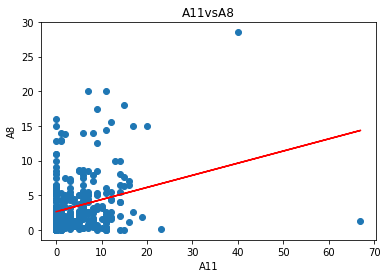

r_squared value forA11A8
0.07201623632288788


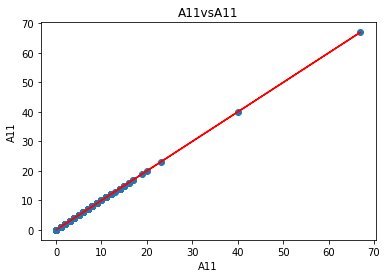

r_squared value forA11A11
1.0


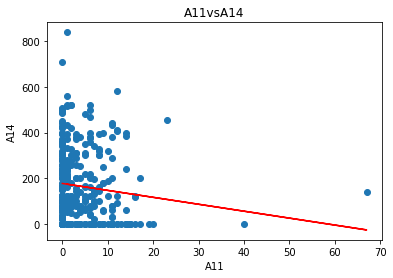

r_squared value forA11A14
0.014185566010616891


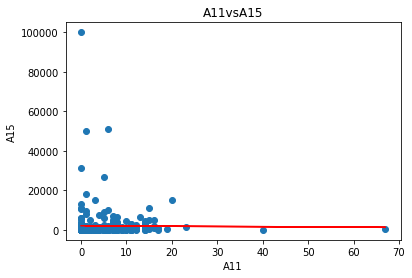

r_squared value forA11A15
8.877793912978175e-05


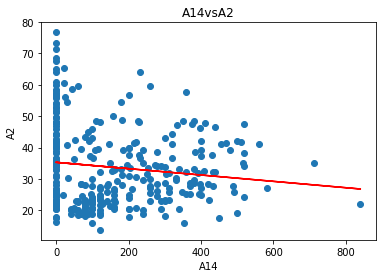

r_squared value forA14A2
0.016266362935134525


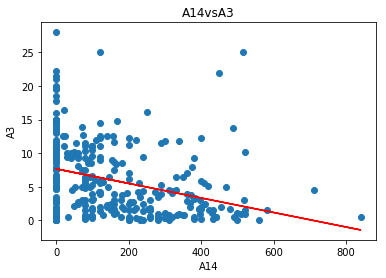

r_squared value forA14A3
0.10186242043699097


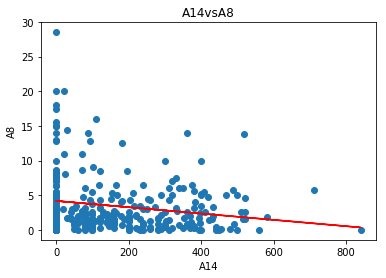

r_squared value forA14A8
0.03184220342147713


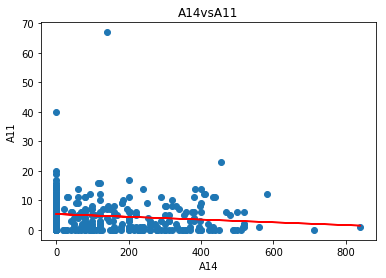

r_squared value forA14A11
0.014185566010616891


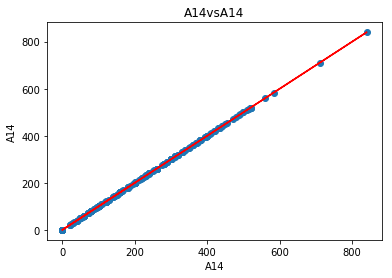

r_squared value forA14A14
1.0


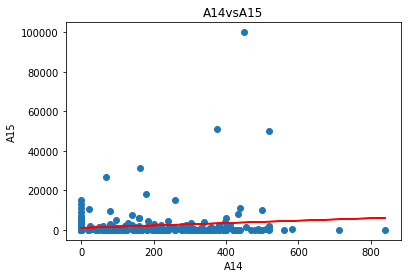

r_squared value forA14A15
0.016383295756762357


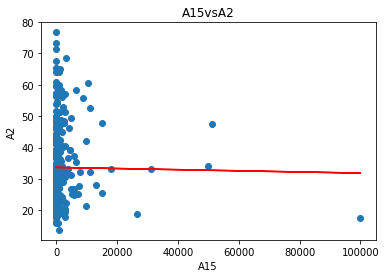

r_squared value forA15A2
0.0001191552038677163


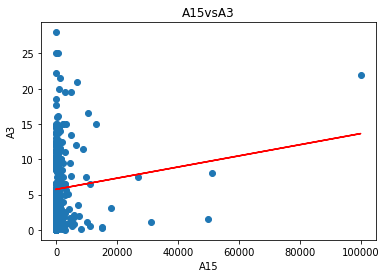

r_squared value forA15A3
0.01222705644635428


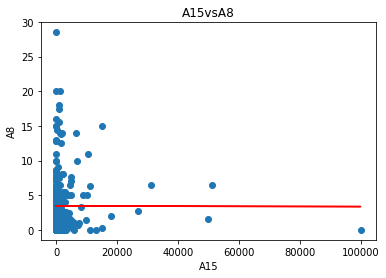

r_squared value forA15A8
1.8681306603300208e-06


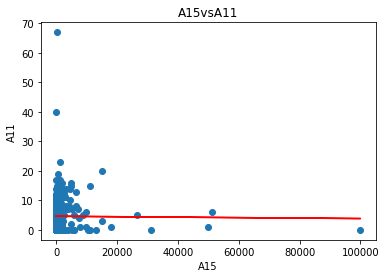

r_squared value forA15A11
8.877793912978175e-05


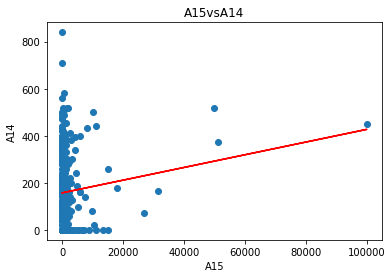

r_squared value forA15A14
0.016383295756762357


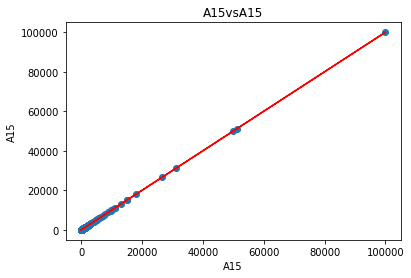

r_squared value forA15A15
1.0


In [62]:
for a in ['A2',"A3", "A8", "A11",'A14', "A15"]:
  for b in ['A2', "A3", "A8", "A11",'A14', "A15"]:
    x =table1[a]
    y = table1[b]
    slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
    line = slope*x+intercept

    plt.scatter(x,y)

    plt.plot(x, line, color='red')

    plt.xlabel(a)
    plt.ylabel(b)
    plt.title(a +"vs"+ b)
    plt.show()


    print('r_squared value for' + a + b)
    print (r_value**2)


In [0]:
table2 = data[data['A16']=='-']

In [64]:
table2.describe()

,A2,A3,A8,A11,A14,A15
count,383.000000,383.000000,383.000000,383.000000,383.000000,383.000000
mean,29.753185,3.839948,1.257924,0.631854,200.375979,198.605744
std,10.856638,4.337662,2.120481,1.900049,181.301778,671.608839
min,15.170000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,22.000000,0.835000,0.125000,0.000000,100.000000,0.000000
50%,27.330000,2.210000,0.415000,0.000000,168.000000,1.000000
75%,34.830000,5.000000,1.500000,0.000000,278.000000,67.000000
max,80.250000,26.335000,13.875000,20.000000,2000.000000,5552.000000


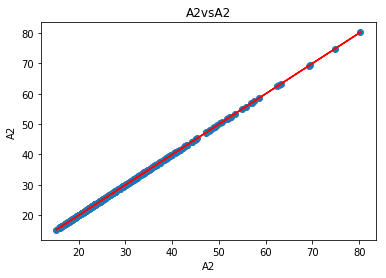

r_squared value forA2A2
1.0


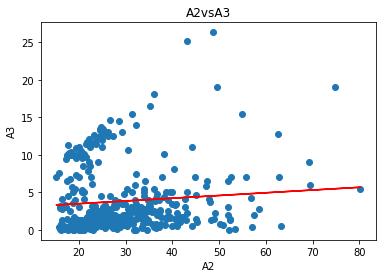

r_squared value forA2A3
0.008298020105101382


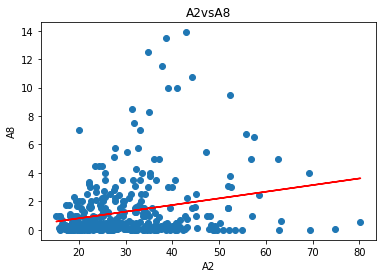

r_squared value forA2A8
0.057218924464611395


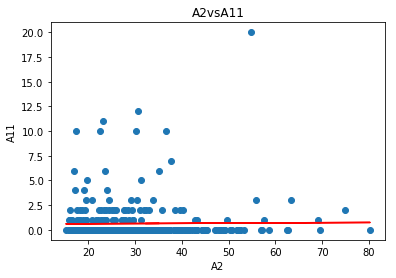

r_squared value forA2A11
0.00015729790272497987


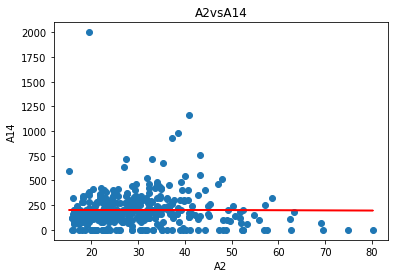

r_squared value forA2A14
2.5071906893944372e-05


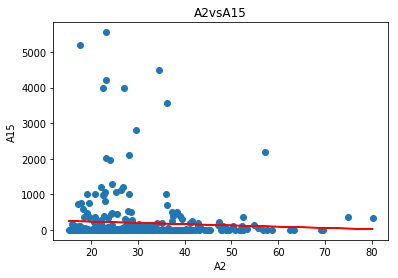

r_squared value forA2A15
0.0032611539654415996


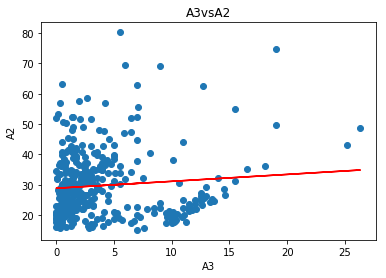

r_squared value forA3A2
0.008298020105101382


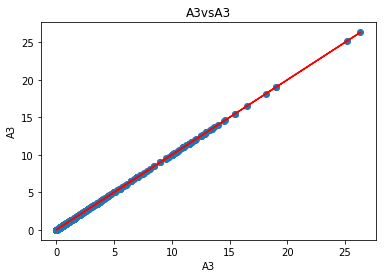

r_squared value forA3A3
1.0


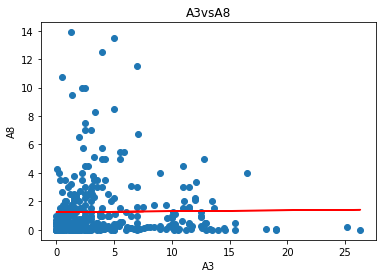

r_squared value forA3A8
0.00018699851458092053


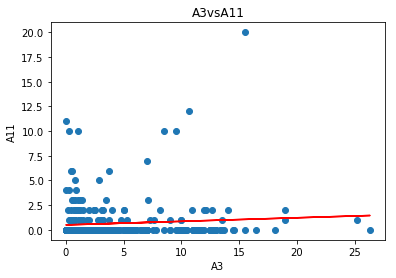

r_squared value forA3A11
0.006838951348163509


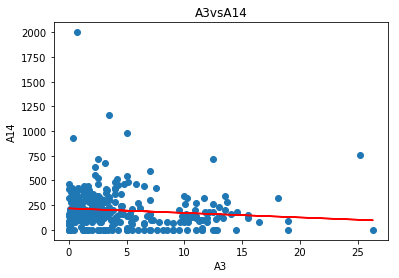

r_squared value forA3A14
0.012045802812997919


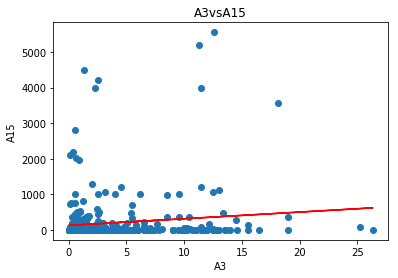

r_squared value forA3A15
0.014622381056292254


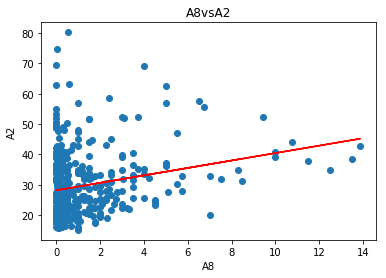

r_squared value forA8A2
0.057218924464611395


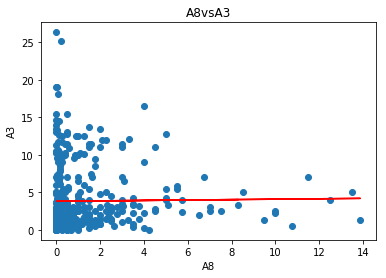

r_squared value forA8A3
0.00018699851458092053


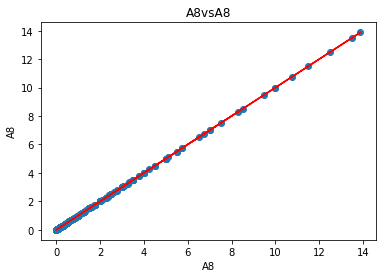

r_squared value forA8A8
1.0


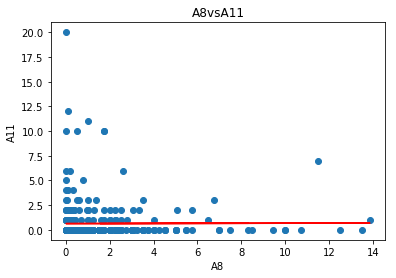

r_squared value forA8A11
1.5083027658549016e-05


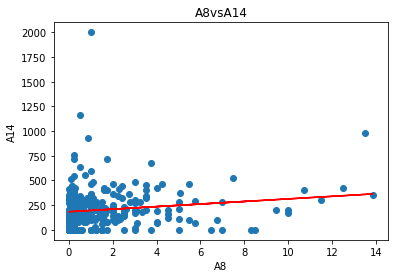

r_squared value forA8A14
0.023012138210653812


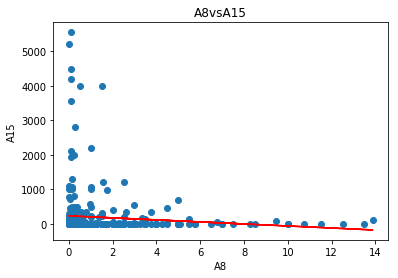

r_squared value forA8A15
0.008606977039719637


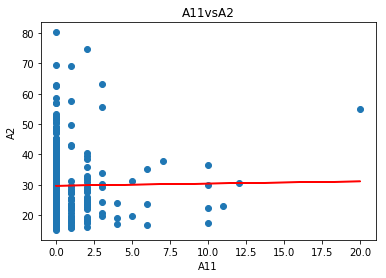

r_squared value forA11A2
0.00015729790272497987


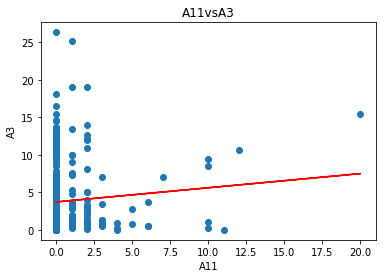

r_squared value forA11A3
0.006838951348163509


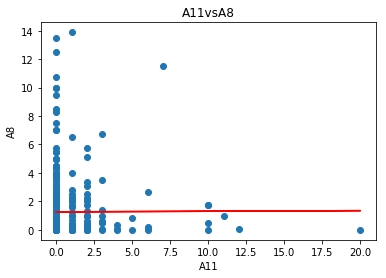

r_squared value forA11A8
1.5083027658549016e-05


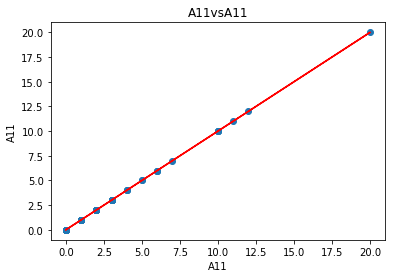

r_squared value forA11A11
1.0


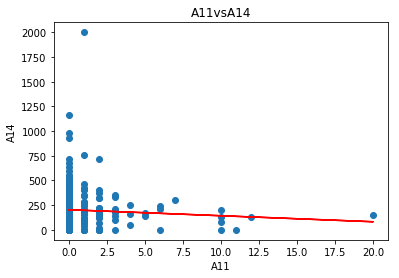

r_squared value forA11A14
0.00405920189241734


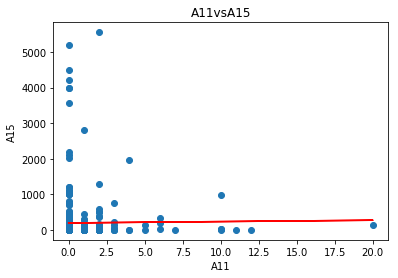

r_squared value forA11A15
0.00011490833082982822


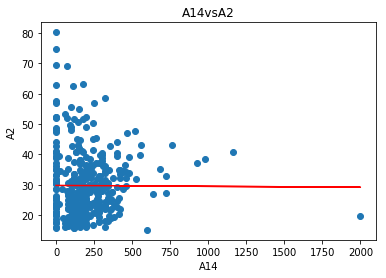

r_squared value forA14A2
2.5071906893944372e-05


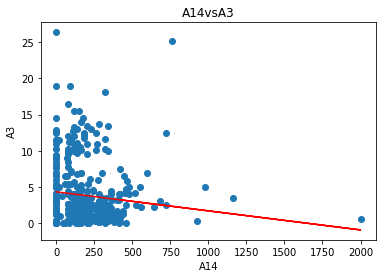

r_squared value forA14A3
0.012045802812997919


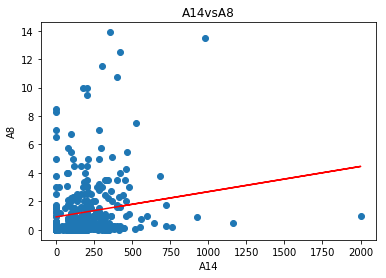

r_squared value forA14A8
0.023012138210653812


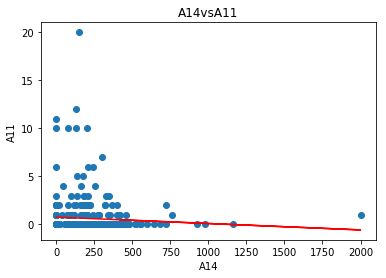

r_squared value forA14A11
0.00405920189241734


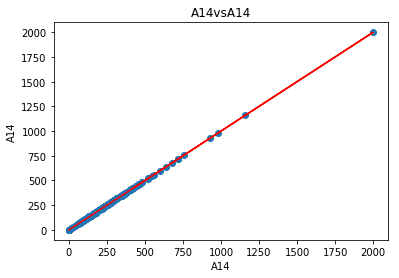

r_squared value forA14A14
1.0


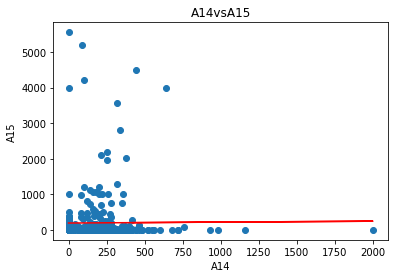

r_squared value forA14A15
4.812988439958985e-05


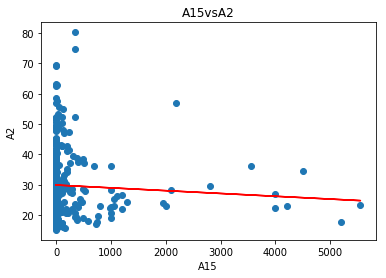

r_squared value forA15A2
0.0032611539654415996


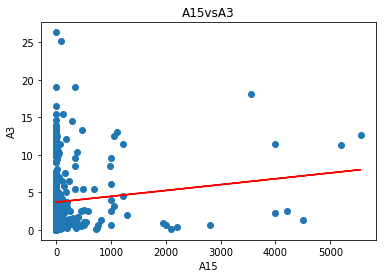

r_squared value forA15A3
0.014622381056292254


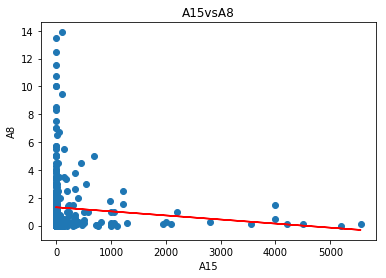

r_squared value forA15A8
0.008606977039719637


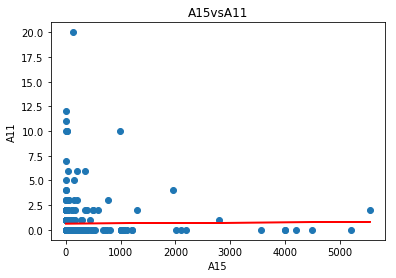

r_squared value forA15A11
0.00011490833082982822


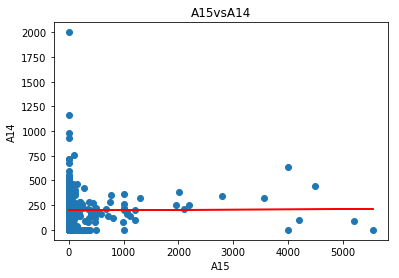

r_squared value forA15A14
4.812988439958985e-05


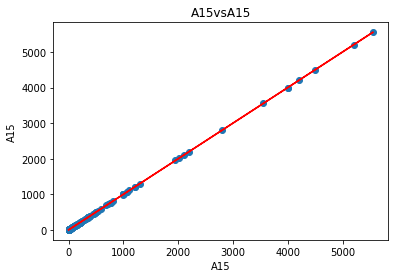

r_squared value forA15A15
1.0


In [65]:
for a in ['A2', "A3", "A8", "A11",'A14', "A15"]:
  for b in ['A2', "A3", "A8", "A11",'A14', "A15"]:
    x =table2[a]
    y = table2[b]
    slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
    line = slope*x+intercept

    plt.scatter(x,y)

    plt.plot(x, line, color='red')

    plt.xlabel(a)
    plt.ylabel(b)
    plt.title(a +"vs"+ b)
    plt.show()


    print('r_squared value for' + a + b)
    print (r_value**2)


In [69]:
for a in ['A2', "A3", "A8", "A11",'A14', "A15"]:
    print("t test" + ' '+ a)
    
    print(stats.ttest_ind(table1[a], table2[a], equal_var=True))

t test A2
Ttest_indResult(statistic=4.314537665589307, pvalue=1.833817735205033e-05)
t test A3
Ttest_indResult(statistic=5.52998337614816, pvalue=4.551680702308068e-08)
t test A8
Ttest_indResult(statistic=8.935819983773698, pvalue=3.6710537401601785e-18)
t test A11
Ttest_indResult(statistic=11.667004222431277, pvalue=7.957718568079967e-29)
t test A14
Ttest_indResult(statistic=-2.8172805065288804, pvalue=0.004982145446164413)
t test A15
Ttest_indResult(statistic=4.680216020964486, pvalue=3.4520256956287944e-06)


In [0]:
#A11 is extremely different

#A2 is less extreme.

In [79]:
for x in [1, 4, 5, 6, 7, 9, 10,12, 13]:
  y = "A"+ str(x)
  print("Chi Squared Test" + ' ' + "A16"+ ' '+ y)
  obs= pd.crosstab(data.A16, data[y], margins=False)

  print(obs)

  print (stats.chi2_contingency(obs))

Chi Squared Test A16 A1
A1     a    b
A16          
+    100  207
-    114  269
(0.503725416086821, 0.47786776443128076, 1, array([[ 95.21449275, 211.78550725],
       [118.78550725, 264.21449275]]))
Chi Squared Test A16 A4
A4   l    u    y
A16             
+    2  260   45
-    0  264  119
(27.381959088907593, 1.1326171463492892e-06, 2, array([[  0.88985507, 233.14202899,  72.96811594],
       [  1.11014493, 290.85797101,  91.03188406]]))
Chi Squared Test A16 A5
A5     g  gg    p
A16              
+    260   2   45
-    264   0  119
(27.381959088907593, 1.1326171463492892e-06, 2, array([[233.14202899,   0.88985507,  72.96811594],
       [290.85797101,   1.11014493,  91.03188406]]))
Chi Squared Test A16 A6
A6   aa   c  cc   d   e  ff   i  j   k   m   q  r   w   x
A16                                                      
+    19  64  29   7  14   7  14  3  14  16  53  2  33  32
-    35  75  12  23  11  46  47  7  38  22  27  1  33   6
(101.15724449221705, 9.895986843584472e-16, 13, arra

## Part 3 - Analysis and Interpretation

Now that you've looked at the data, answer the following questions:

- Interpret and explain the two t-tests you ran - what do they tell you about the relationships between the continuous features you selected and the class labels?
- Interpret and explain the two Chi-squared tests you ran - what do they tell you about the relationships between the categorical features you selected and the class labels?
- What was the most challenging part of this sprint challenge?

Answer with text, but feel free to intersperse example code/results or refer to it from earlier.

In [0]:
#Question 1
#I divided my initial dataframe into two different dataframes and ran a t test on the same column for both + and -

# All my t tests had a p value of less than 0.05, showing that there is a significant difference between the means
#of all columns in + and -
#A11 is extremely different
#A2 is less extreme.

#Question 2
#I created a crosstab for column variable in terms of class (+/-) attributes. THe chi squared test was meant to test
#if the variables involved (+/-) were independent (null hypothesis). Some chi squared test returned a p value <0.05
# rejecting the null hypothesis. It was the case for A16& A4
#A16 & A1 supported the null hypothesis

#Question3
#The hardest part was interpretating the chi squared contingency test


*Your words here!*